# Edge Detection

Pada tugas ini, akan dibandingkan tiga metode yang biasa digunakan untuk deteksi tepi yakni
- Sobel Egde Detection
- Canny Edge Detection
- Hildreth-Marr (Laplacian of Gaussian)

NOTE!!

Kalau ingin menjalankan notebook ini di AWS Sagemaker Studio Lab, perlu menginstall package opencv yang versi headless dengan menjalankan perintah berikut


In [8]:
!pip install opencv-python-headless

     |████████████████████████████████| 48.3 MB 4.0 MB/s eta 0:00:01


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Data Gambar

Proses deteksi tepi akan coba dilakukan pada gambar berikut
- koin
<br/>
<img src="coin.jpg" style="width: 90px;"/>
<br/>
- plat
<br/>
<img src="plat.jpg" style="width: 90px;"/>
<br/>
- mikroorganisme
<br/>
<img src="Picture1.jpg" style="width: 90px;"/>
<br/>

Semua gambar akan dimuat dalam warna grayscale


In [81]:
coin_img = cv2.imread('./coin.jpg',0)
plat_img = cv2.imread('./plat.jpg',0)
organism_img = cv2.imread('./Picture1.jpg',0)

Berikut merupakan tampilan dari gambar tersebut

(-0.5, 321.5, 321.5, -0.5)

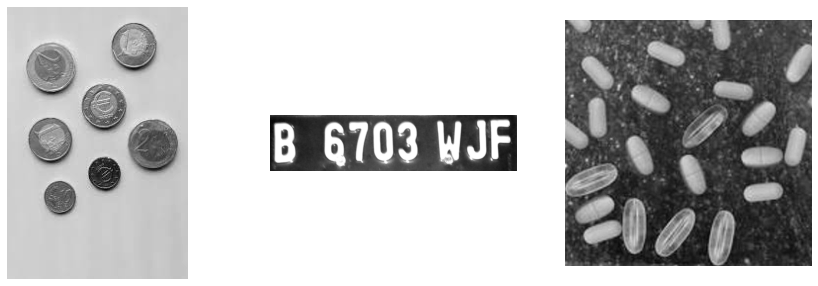

In [82]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_img, cmap='gray')
im1.axis('off')
im2.imshow(plat_img, cmap='gray')
im2.axis('off')
im3.imshow(organism_img, cmap='gray')
im3.axis('off')

## Sobel Edge Detector


In [43]:
def sobel_detector(img):
    sobel_x = cv2.Sobel(img.copy(), cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    sobel_y = cv2.Sobel(img.copy(), cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    abs_x = cv2.convertScaleAbs(sobel_x)
    abs_y = cv2.convertScaleAbs(sobel_y)
    img_add = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 0)
    return img_add 


In [70]:
coin_sobel = sobel_detector(coin_img)
plat_sobel = sobel_detector(plat_img)
organism_sobel = sobel_detector(organism_img)

(-0.5, 321.5, 321.5, -0.5)

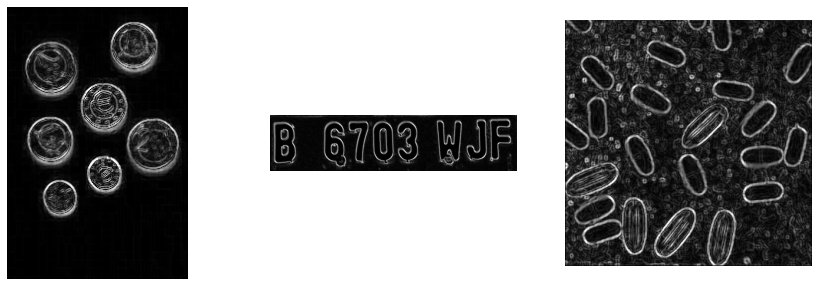

In [71]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_sobel, cmap='gray')
im1.axis('off')
im2.imshow(plat_sobel, cmap='gray')
im2.axis('off')
im3.imshow(organism_sobel, cmap='gray')
im3.axis('off')


## Marr-Hilldreth Edge Detector (Laplacian of Gaussian)

In [22]:
def laplacian_of_gaussian(img):
    img_laplace_blur = cv2.GaussianBlur(img.copy(), (3,3), 0)
    img_laplace = cv2.Laplacian(img_laplace_blur, cv2.CV_16S, ksize=3)
    img_laplace_abs = cv2.convertScaleAbs(img_laplace)
    return img_laplace_abs


In [24]:
coin_log = laplacian_of_gaussian(coin_img)
plat_log = laplacian_of_gaussian(plat_img)
organism_log = laplacian_of_gaussian(organism_img)

(-0.5, 321.5, 321.5, -0.5)

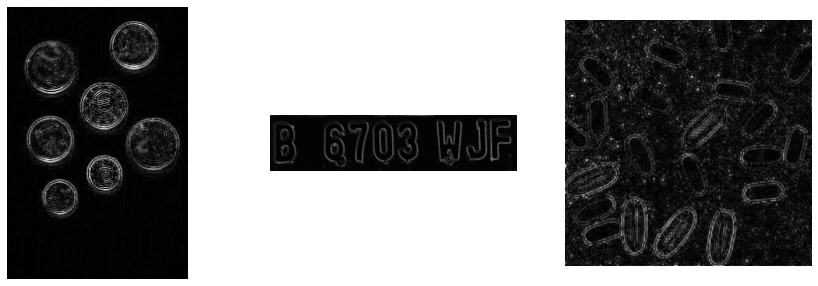

In [25]:
fig, (im1, im2, im3) = plt.subplots(1,3)
fig.set_size_inches(15,5)
im1.imshow(coin_log, cmap='gray')
im1.axis('off')
im2.imshow(plat_log, cmap='gray')
im2.axis('off')
im3.imshow(organism_log, cmap='gray')
im3.axis('off')

## Canny Edge Detection

In [13]:
# lower bound
lower_bound = 100
# ratio for upper bound
ratio = 2 

In [ ]:
def canny_detector(img, lower_bound, ratio, kernel_size):
    canny_img = cv2.Canny(img.copy(), lower_bound, lower_bound * ratio, kernel_size)
    

In [ ]:
coin_canny = cv2.Canny(

## Implementasi versi "nggak terlalu from scratch"
    
Pada bagian implementasi fungsi deteksi tepi ini, digunakan library scipy untuk membantu perhitungan konvolusi antara kernel dan gambar

In [111]:
import scipy.signal as sig

def sobel_scratch(img):
    x_kernel = [
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ]
    y_kernel = [
        [-1,-2,-1],
        [0,0,0],
        [1,2,1]
    ]

    x_conv = sig.convolve2d(img.copy(), x_kernel, mode='same')
    y_conv = sig.convolve2d(img.copy(), y_kernel, mode='same')

    img_g = np.sqrt(np.square(x_conv)+np.square(y_conv))
    #img_g_scaled = np.floor(img_g*255/np.max(img_g))
    img_g_scaled = np.floor(np.abs(img_g)*255/np.max(img_g))


    return np.array(img_g_scaled, dtype=np.uint8)



In [112]:
img_scratch = sobel_scratch(plat_img)

(-0.5, 846.5, 189.5, -0.5)

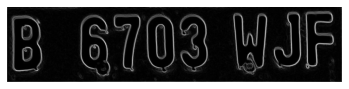

In [114]:
plt.imshow(img_scratch, cmap='gray')
plt.axis('off')